# TP n°5: Contrôle du fermenteur continu

## Objectif

On cherche à contrôler le processus de fermentation en réacteur continu. On va donc utiliser le modèle de la fermentation alcoolique en réacteur continu et proposer des lois de commandes. 

On se fixe comme objectif de commande de contrôler la valeur de la concentration en sucre dans le réacteur. Pour cela, on va procéder en plusieurs étapes:

1. [Calcul des points d'équilibre](#equilibre)

2. [Commande boucle ouverte](#BO)

3. [Commande boucle fermée PI](#PI)

In [18]:
import numpy as np # module numpy: vecteur, matrices, instructions vectorisees
import matplotlib.pyplot as plt # module matplotlib: librairie graphique
import scipy.integrate as scint
import scipy.optimize as scop
from ipywidgets import interact, fixed
#from IPython.html.widgets import interact, fixed

plt.close('all') # close all figure

## <a name='equilibre'>1. Calcul des points d'équilibre</a>
Rappelons d'abord que le modèle du fermenteur continu s'écrit:
$$
\left\{
\begin{array}{crl}
\frac{dX}{dt}= & \mu_1(N)X &-DX\\
\frac{dN}{dt}= & -k_1\mu_1(N)X&+D(N_{in}-N)  \\
\frac{dE}{dt}= & \mu_2(E,S)X &-DE \\
\frac{dS}{dt}= & -k_2\mu_2(E,S)X&+D(S_{in}-S) 
\end{array}
\right.
\text{ avec }
\left\{
\begin{array}{lcr}
 \mu_1(N)&=&\mu_1^{max}\frac{N}{K_N+N}\\
 \mu_2(E,S)&=&\mu_2^{max}\frac{S}{K_S+S}\frac{K_E}{K_E+E}.
\end{array}
\right.
$$
On utilisera comme valeurs de paramètres les valeurs identifiées à l'étape précédente.

On peut montrer (admis) que le domaine $\mathcal{D}=\left\{ (X,N,E,S)\in\mathbb{R}^4\text{ tel que }0\leqslant X \leqslant \frac{N_{in}-N}{k_1},\,0\leqslant N \leqslant N_{in},\,0\leqslant E \leqslant \frac{S_{in}-S}{k_2},\,0\leqslant S \leqslant S_{in},  \right\}$ est un invariant positif du système. Cela veut dire que si la condition initiale est dans $\mathcal{D}$ alors la trajectoire solution du système restera dans $\mathcal{D}$.

In [19]:
# modèle de fermentation en réacteur continu
def cont_fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin):
    # variables d'état du systèeme
    B = x[0] # biomasse
    N = x[1] # azote
    E = x[2] # ethanol
    S = x[3] # sucre
    
    # initialisation du vecteur second membre du système
    dx = np.zeros(4) # dérivées de B, N, E et S
    
    # calcul de mu1(S)
    mu1 = mu1max*N/(KN+N)
    # calcul de mu2(E,S)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    
    # second membre de l'équation de B
    dx[0] = mu1*B-Qin/V*B
    # second membre de l'équation de N
    dx[1] = -k1*mu1*B+Qin/V*(Nin-N)
    # second membre de l'équation de E
    dx[2] = mu2*B-Qin/V*E
    # second membre de l'équation de S
    dx[3] = -k2*mu2*B+Qin/V*(Sin-S)
                             
    return dx
    
# paramètres du modèle de réacteur batch: valeurs identifiées à l'étape précédente
k2 = 2.08478746168
k1 = 0.0280270885286
mu1max = 2.79969755302
mu2max = 4.38785020243
KN = 0.965992617646
KE = 3.13132366747
KS = 0.0396396754502
B0 = 0.000239863343873
N0 = 0.1994142379
E0 = 0.216807301097
S0 = 193.763999683
# paramètres supplémentaires pour le modèle de réacteur continu
Qin = 0.1
V = 0.5
Nin = 0.425
Sin = 200

Pour claculer les points d'équilibre du système, il faut résoudre le système:
$$
\left\{
\begin{array}{r}
\frac{dX}{dt} =  0\\
\frac{dN}{dt} =  0  \\
\frac{dE}{dt} =  0 \\
\frac{dS}{dt} =  0
\end{array}
\right.
\Leftrightarrow 
\left\{
\begin{array}{rl}
\mu_1(N)X -DX& =0\\
-k_1\mu_1(N)X+D(N_{in}-N)& =0  \\
\mu_2(E,S)X -DE & =0\\
-k_2\mu_2(E,S)X+D(S_{in}-S) & =0
\end{array}
\right.
$$

Le résolution de ce système mène à deux cas:

- Cas n°1: $X^{eq}=0$

 A COMPLETER
 
On note ce point d'équilibre $E_0$:
$$\boxed{E_0=\left(X^{eq}= ,  N^{eq}=, E^{eq}=, S^{eq}= \right)}$$

- Cas n°2: $X^{eq}\neq 0$

A COMPLETER

On note $E_1$ ce nouveau point d'équilibre donné par:
$$\boxed{E_1=\left(X^{eq}= ,  N^{eq}=, E^{eq}=, S^{eq}=\right) }$$

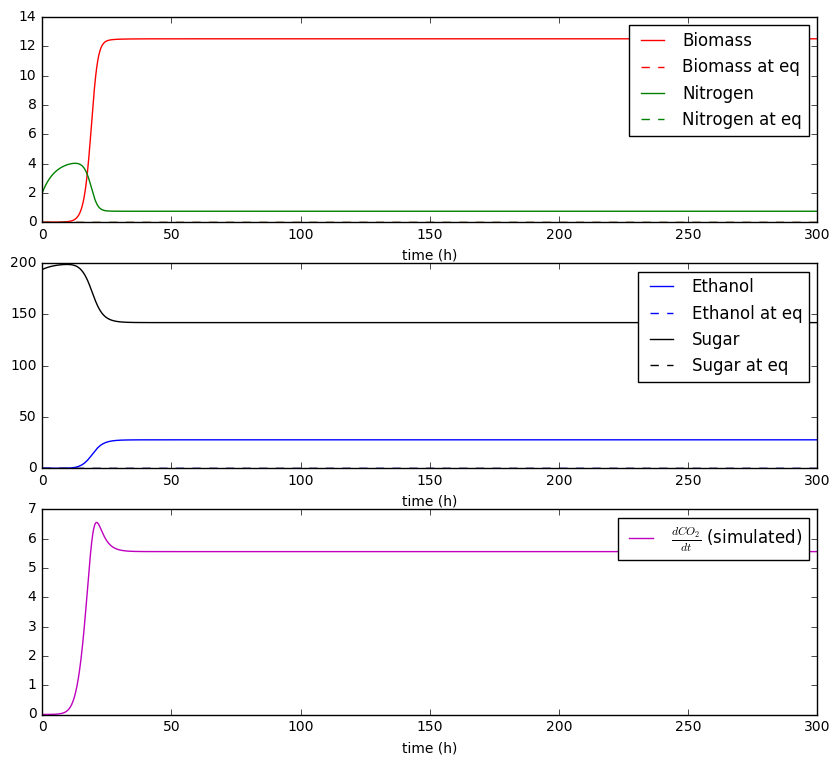

In [20]:
# Calcul des points d'équilibre
# -----------------------------
# A COMPLETER
# valeur de N à l'équilibre
Neq = 0
# valeur de X à l'équilibre
Beq = 0
# valeur de S à l'équilibre:
Seq = 0
# Valeur de E à l'équilibre
Eeq = 0

# Simulation du modèle
# --------------------
# conditions initiales
x0 = np.array([B0, N0, E0, S0])

# vecteur temps
t = np.arange(0,300,0.1)

# integration numerique de l'EDO
y = scint.odeint(cont_fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin))

# Tracé
# -----
# tracé des variables simulées et des points d'équilibre pour vérifier que les trajectoires convergent bien vers le point
# d'équilibre calculé
f2, ax2 = plt.subplots(3,1,figsize = (10, 9))

ax2[0].plot(t,y[:,0],'r',label='Biomass')
ax2[0].plot([t[0],t[-1]],Beq*np.array([1,1]),'r--',label='Biomass at eq')
ax2[0].plot(t,y[:,1]*10,'g',label='Nitrogen')
ax2[0].plot([t[0],t[-1]],Neq*np.array([10,10]),'g--',label='Nitrogen at eq')
ax2[0].legend()
ax2[0].set_xlabel('time (h)')

ax2[1].plot(t,y[:,2],'b',label='Ethanol')
ax2[1].plot([t[0],t[-1]],Eeq*np.array([1,1]),'b--',label='Ethanol at eq')
ax2[1].plot(t,y[:,3],'k',label='Sugar')
ax2[1].plot([t[0],t[-1]],Seq*np.array([1,1]),'k--',label='Sugar at eq')
ax2[1].legend()
ax2[1].set_xlabel('time (h)')

ax2[2].plot(t,mu2max*y[:,3]/(KS+y[:,3])*KE/(KE+y[:,2])*y[:,0],'m',label=r'$\frac{dCO_2}{dt}$ (simulated)')
ax2[2].legend()
ax2[2].set_xlabel('time (h)')

plt.show()

## <a name='BO'>2. Commande boucle ouverte</a>

On note $S^\ast$ la valeur de $S$ que l'on souhaite atteindre (la consigne).

Trouver la commande (constante) en boucle ouverte revient à chercher la valeur de $Q$ telle que la valeur de $S$ à l'équilibre vaille $S^\ast$.

A COMPLETER


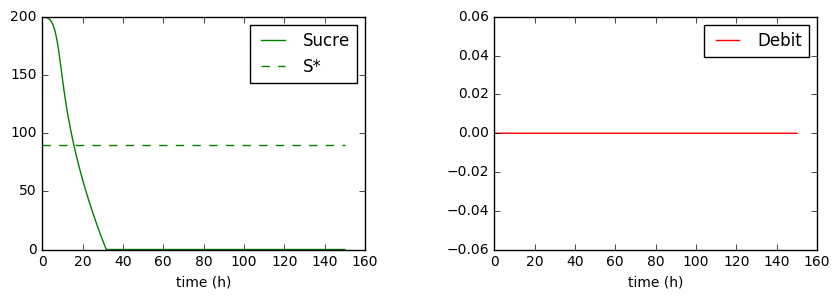

<function __main__.test>

In [21]:

# --------------------------
# Commande en boucle ouverte
# --------------------------
# modèle de fermentation en réacteur continu:
# on modifie légèrement la fonction qui code le modèle de fermentation en réacteur continu
# pour pouvoir tester des lois de commande
# On rajoute les variables suivantes:
#  Sast : la valeur de S qu'on veut atteindre (consigne)
# control_type : le type de loi de commande à appliquer
# coeffcontrol : les paramètres de la loi de commande
# disturb: une valeur représentant une perturbation de la commande. 
# La commande réellement appliquée n'est pas exactement égal à celle calculée. 
# On a: Qreal = Qcalc*(1+disturb)

def cont_fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
                  Sast,control_type,coeffcontrol,disturb):
    
    # variables d'état du systèeme
    B = x[0] # biomasse
    N = x[1] # azote
    E = x[2] # ethanol
    S = x[3] # sucre
    
    # initialisation du vecteur second membre du système
    dx = np.zeros(4) # dérivées de B, N, E et S
    
    # loi de commande
    Q = fonction_u(t,x,Sast,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
                   control_type,coeffcontrol)*(1+disturb)
    
    # calcul de mu1(S)
    mu1 = mu1max*N/(KN+N)
    # calcul de mu2(E,S)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    
    # second membre de l'équation de B
    dx[0] = mu1*B-Q/V*B
    # second membre de l'équation de N
    dx[1] = -k1*mu1*B+Q/V*(Nin-N)
    # second membre de l'équation de E
    dx[2] = mu2*B-Q/V*E
    # second membre de l'équation de S
    dx[3] = -k2*mu2*B+Q/V*(Sin-S)
                             
    return dx


def fonction_u(t,x,Sast,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
               control_type,coeffcontrol):
    
    if control_type == 'BO': # Controle BOUCLE OUVERTE
        Qast = coeffcontrol
        valu = np.ones(np.size(t))*Qast
    return valu


def culture_cont(Sast,control_type,coeffcontrol,disturb):
    # vecteur temps
    tmax = 150
    temps = np.linspace(0,tmax,2000) # vecteur temps
    
    # condition initiale 
    if control_type in ['PI']: 
        x0 = np.array([0.01, Nin, 0, Sin,0])
    else: 
        x0 = np.array([0.01, Nin, 0, Sin])
    
    # integration numerique de l'EDO
    x = scint.odeint(cont_fermenter,x0,temps, \
                     args=(k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
                           Sast,control_type,coeffcontrol,disturb))
    
    # loi de commande (recalculée a posteriori car non stockée avant)
    u = fonction_u(temps,x,Sast,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
               control_type,coeffcontrol)
    
    # tracé des trajectoires simulées
    plt.figure(figsize = (10, 3))
    plt.subplots_adjust(hspace=0.4,wspace=0.4)
    plt.subplot2grid((1,2),(0,0))
    plt.plot(temps,x[:,3],'g',label='Sucre')
    plt.plot(np.array([0,temps[-1]]),np.array([Sast,Sast]),'g--',label='S*')
    plt.legend(); plt.xlabel('time (h)')
    plt.ylim([0,Sin])
    
    plt.subplot2grid((1,2),(0,1))
    plt.plot(temps,u,'r',label='Debit')
    plt.legend(); plt.xlabel('time (h)')
    plt.show()

def test(Sast):
    # calcul de la valeur de la commande constante en boucle ouverte
    # A COMPLETER
    Qast = 0
    return culture_cont(Sast,'BO',Qast,0)

# tracé intéractif de l'évolution de S lorsque le système est contrôlé en boucle ouverte
interact(test,Sast=(0,180,10))

## <A name='PI'>3. Commande boucle fermée PI</a>

On applique la commande PI suivante:

$$ Q(t)=K_0+K_p(S^\ast-S^m(t))+K_i\int_0^t(S^\ast-S^m(s))ds$$


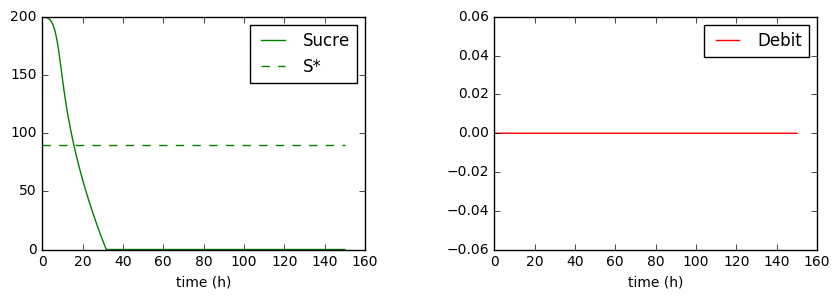

<function __main__.test2>

In [22]:
def cont_fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
                  Sast,control_type,coeffcontrol,disturb):
    
    # variables d'état du systèeme
    B = x[0] # biomasse
    N = x[1] # azote
    E = x[2] # ethanol
    S = x[3] # sucre
    
    if control_type == 'PI':
        intS = x[4]
    
    # initialisation du vecteur second membre du système
    if control_type == 'PI':
        dx = np.zeros(5) # dérivées de B, N, E, S et intégrale de Sast-S
    else:
        dx = np.zeros(4) # dérivées de B, N, E et S
    
    # loi de commande
    Q = fonction_u(t,x,Sast,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
                   control_type,coeffcontrol)*(1+disturb)
    
    # calcul de mu1(S)
    mu1 = mu1max*N/(KN+N)
    # calcul de mu2(E,S)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    
    # second membre de l'équation de B
    dx[0] = mu1*B-Q/V*B
    # second membre de l'équation de N
    dx[1] = -k1*mu1*B+Q/V*(Nin-N)
    # second membre de l'équation de E
    dx[2] = mu2*B-Q/V*E
    # second membre de l'équation de S
    dx[3] = -k2*mu2*B+Q/V*(Sin-S)
    
    if control_type == 'PI':
        dx[4] = Sast-S
                             
    return dx

def fonction_u(t,x,Sast,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,Nin,Sin, \
               control_type,coeffcontrol):
    
    if control_type == 'BO': # Controle BOUCLE OUVERTE
        Qast = coeffcontrol
        valu = np.ones(np.size(t))*Qast
    if control_type == 'PI': # Controle BOUCLE FERMEE PI
        # A COMPLETER
        valu = np.zeros(np.size(t))
    return valu


def test2(Sast,k0,kprop,kint,disturb):

    return culture_cont(Sast,'PI',np.array([k0,kprop,kint]),disturb)

# tracé intéractif de l'évolution de S lorsque le système est contrôlé en boucle fermée PI
interact(test2,Sast=(0,180,10),k0=(0,0.1,0.01),kprop=(0,0.001,0.0001),kint=(0,0.001,0.0001),disturb=(0,0.4,0.01))

